In [1]:
% matplotlib inline
import cv2
import matplotlib.pyplot as plt

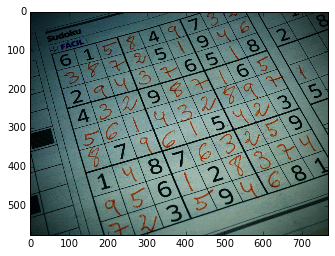

In [2]:
image = cv2.imread('img/soduku.jpg')
plt.imshow(image)

#### cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
* Threshold here is the minimum vote for it to be considered a line

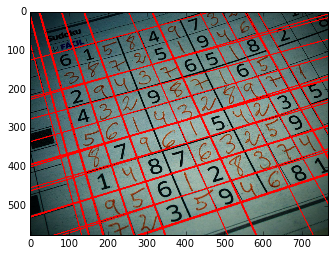

In [3]:
import cv2
import numpy as np

image = cv2.imread('img/soduku.jpg')

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# rho accuracy of 1 pixel
# theta accuracy of 1 degree (np.pi / 180)
# line threshold is 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# iterate through each line and convert it to the format required by cv.lines
# (i.e. requiring end points)
for rho, theta in np.squeeze(lines, 1):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(image)

#### cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)
* Probabilistic Hough Lines
* [Paper](http://cmp.felk.cvut.cz/~matas/papers/matas-bmvc98.pdf)

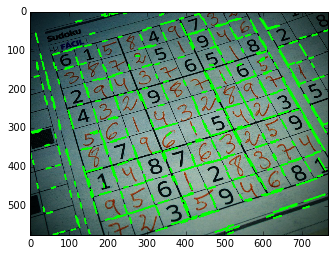

In [5]:
import cv2
import numpy as np

# Grayscale and Canny Edges extracted
image = cv2.imread('img/soduku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# we use the same rho and theta accuracies
# however, we specific a minimum vote (pts along line) of 100
# and min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 5, 10)

for x1, y1, x2, y2 in np.squeeze(lines, 1):
    cv2.line(image, (x1, y1), (x2, y2),(0, 255, 0), 3)

plt.imshow(image)